In [1]:
from tqdm import tqdm
import glob
import cv2
import os
from fastai.vision import *
from fastai.vision.models import *
import python_utils
from utils import *
import torch
import pretrainedmodels.utils as utils 
from torchvision import models
import torch
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pretrainedmodels
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger

In [8]:
path = '/home/harsh/amk/base_dataset/Train_2/'
inp_path = Path(path)


In [9]:
data =  ImageDataBunch.from_folder(inp_path, train = 'Train_2',
                                         valid_pct=0.2, \
                                         #ds_tfms=get_transforms(), \
                                         size = (128,128), \
                                         bs = 10, num_workers=4).normalize(imagenet_stats)

In [10]:
#model_list = [models.squeezenet1_0, models.densenet161, models.]
learn = cnn_learner(data, models.densenet161,callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
defaults.device = torch.device('cuda')

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.585768,0.717062,0.245250,0.754750,0.099683,0.826223,0.715601,0.599227,01:37
1,0.415233,0.525758,0.196891,0.803109,0.145220,0.830806,0.771283,0.659632,01:52
2,0.454788,0.403669,0.168394,0.831606,0.140476,0.842815,0.817500,0.695991,02:04
3,0.323918,0.522845,0.177893,0.822107,0.183545,0.856660,0.816437,0.691100,02:07
4,0.239270,0.478487,0.153713,0.846287,0.078342,0.851305,0.835691,0.714682,02:12
5,0.178429,0.451309,0.157168,0.842832,0.154912,0.840787,0.859181,0.707845,02:19
6,0.150986,0.483047,0.152850,0.847150,0.152751,0.848781,0.857527,0.714640,02:17
7,0.128635,0.496452,0.148532,0.851468,0.141905,0.851675,0.858175,0.723343,02:12
8,0.084800,0.515966,0.145941,0.854059,0.144921,0.865330,0.856489,0.731240,02:09
9,0.124976,0.531836,0.140760,0.859240,0.131155,0.872558,0.855521,0.740634,02:10


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


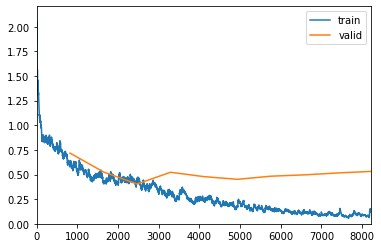

In [11]:

learn.fit_one_cycle(10, callbacks=[OverSamplingCallback(learn),  TerminateOnNaNCallback(),CSVLogger(learn)])

In [6]:
interp = ClassificationInterpretation.from_learner(learn)

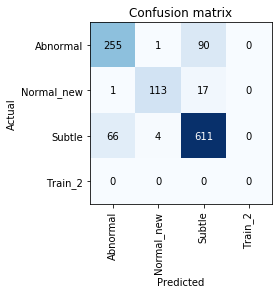

In [7]:
interp.plot_confusion_matrix()

In [14]:
from efficientnet_pytorch import EfficientNet

In [13]:
pip install --upgrade efficientnet-pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.1-cp37-none-any.whl size=12408 sha256=3d6732e8de2a1911f7c22a32260f1bae27f159b9c38ae4a90341e6e3095a3f41
  Stored in directory: /home/harsh/.cache/pip/wheels/0f/b0/79/1663bc9714b5d88deba05e44f593ce50111bd69305a45df87a
Successfully built efficientnet-pytorch
Note: you may need to restart the kernel to use updated packages.


In [15]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://publicmodels.blob.core.windows.net/container/aa/efficientnet-b0-355c32eb.pth" to /home/harsh/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [01:31<00:00, 234kB/s] 

Loaded pretrained weights for efficientnet-b0
